In [1]:
from mne_bids import BIDSPath
import mne
from mne import io
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def load_eeg(sub, ceremony, root):
    paths = BIDSPath(
        subject=sub,
        session=ceremony,
        task="psilo",
        datatype="eeg",
        root=root,
    ).match()

    assert len(paths) == 1, f"Expected 1 path, got {len(paths)} paths: {paths}"
    return io.read_raw(paths[0])

def load_custom_ecg(subject, session, task, bids_root):
    # Construct the file path manually
    file_path = f"{bids_root}/sub-{subject}/ses-{session}/ecg/sub-{subject}_ses-{session}_task-{task}_ecg.csv"
    file_path_trigger = f"{bids_root}/sub-{subject}/ses-{session}/ecg/sub-{subject}_ses-{session}_task-{task}_ecg-trigger.csv"   
    file_path_info = f"{bids_root}/sub-{subject}/ses-{session}/ecg/sub-{subject}_ses-{session}_task-{task}_info.csv"
    # Load the data
    ecg_data = pd.read_csv(file_path)
    ecg_trigger = pd.read_csv(file_path_trigger)
    ecg_info = pd.read_csv(file_path_info)
    return ecg_data, ecg_trigger, ecg_info

In [16]:

BIDS_ROOT = "../data/bids_dataset"

subject = '02'
session = 'ceremony1'
task = 'psilo'
ecg_data, ecg_trigger, ecg_info = load_custom_ecg(subject, session, task, BIDS_ROOT)
ecg_trigger.index /= 256*60

In [5]:
ecg_trigger.columns

Index(['steady_timestamp', 'sequence', 'battery', 'flags', 'ExG [2]-ch1'], dtype='object')

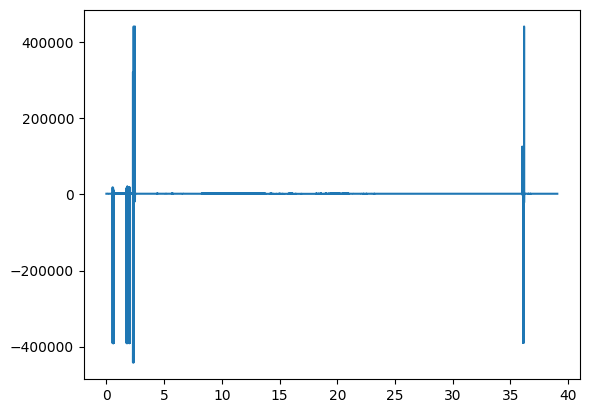

In [ ]:
ecg_trigger["ExG [2]-ch1"].iloc[600000:600000].plot()
plt.show()

In [19]:
raw: io.Raw = load_eeg("01", "ceremony1", "../data/bids_dataset")
raw.ch_names

# Get annotations
annotations = raw.annotations
mask = annotations.description == '9'

# Get the onset of the annotations and the distance between them
onsets = annotations.onset[mask]
diffs = np.diff(onsets)
diffs

Extracting EDF parameters from c:\Users\pthoe\projects\mexico\mushroom_hyperscanning\data\bids_dataset\sub-01\ses-ceremony1\eeg\sub-01_ses-ceremony1_task-psilo_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


array([], dtype=float64)

Extracting EDF parameters from c:\Users\pthoe\projects\mexico\mushroom_hyperscanning\data\bids_dataset\sub-01\ses-ceremony1\eeg\sub-01_ses-ceremony1_task-psilo_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


['EEG P3-Pz',
 'EEG C3-Pz',
 'EEG F3-Pz',
 'EEG Fz-Pz',
 'EEG F4-Pz',
 'EEG C4-Pz',
 'EEG P4-Pz',
 'EEG Cz-Pz',
 'CM',
 'EEG A1-Pz',
 'EEG Fp1-Pz',
 'EEG Fp2-Pz',
 'EEG T3-Pz',
 'EEG T5-Pz',
 'EEG O1-Pz',
 'EEG O2-Pz',
 'EEG X3:-Pz',
 'EEG X2:-Pz',
 'EEG F7-Pz',
 'EEG F8-Pz',
 'EEG X1:ECG-Pz',
 'EEG A2-Pz',
 'EEG T6-Pz',
 'EEG T4-Pz',
 'Pz',
 'Trigger',
 'Event']

NameError: name 'pd' is not defined